<a href="https://colab.research.google.com/github/fouad89/kaggle-feedback-prize/blob/main/feedback_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration Phase and Base Models
<a href="https://www.kaggle.com/competitions/feedback-prize-effectiveness/overview">Kaggle Competition </a> 

In [29]:
import os
import zipfile # uncompressing the data
# Analysis and preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
zip_path = '/content/drive/MyDrive/Kaggle_feedback_competition/feedback-prize-effectiveness.zip'
data_path = '/content/drive/MyDrive/Kaggle_feedback_competition/data'

# creating a data directory
if not os.path.exists(data_path):
    os.makedirs(data_path)
# unzipping
with zipfile.ZipFile(zip_path, 'r') as my_zip:
    my_zip.extractall(data_path)

In [4]:
# reading train and test files
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

## EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


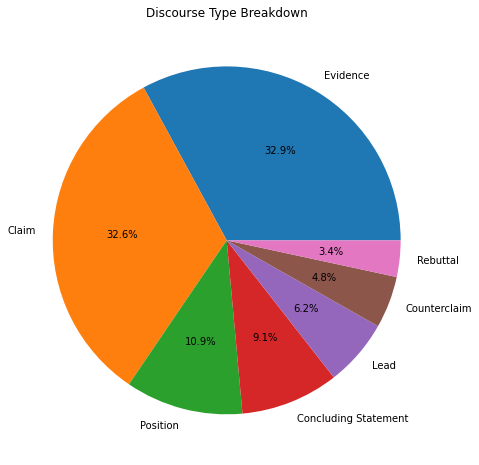

In [18]:
plt.figure(figsize=(8,8))
train_df.discourse_type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Discourse Type Breakdown')
plt.show()


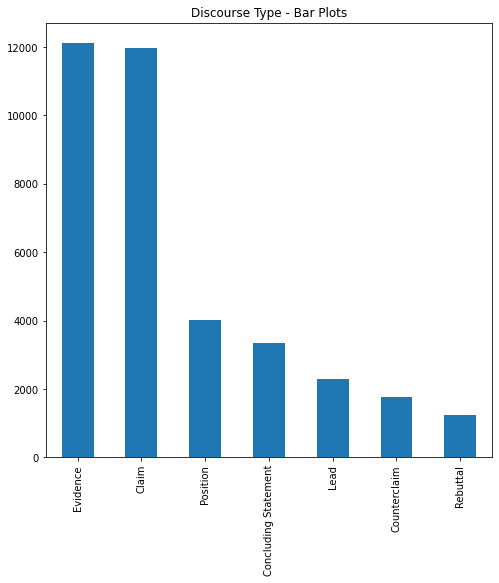

In [19]:
plt.figure(figsize=(8,8))
train_df.discourse_type.value_counts().plot(kind='bar')
plt.title("Discourse Type - Bar Plots")
plt.show()

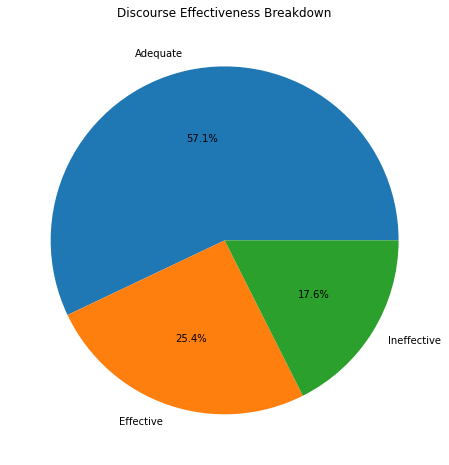

In [21]:
plt.figure(figsize=(8,8))
train_df.discourse_effectiveness.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Discourse Effectiveness Breakdown')
plt.ylabel('')
plt.show()



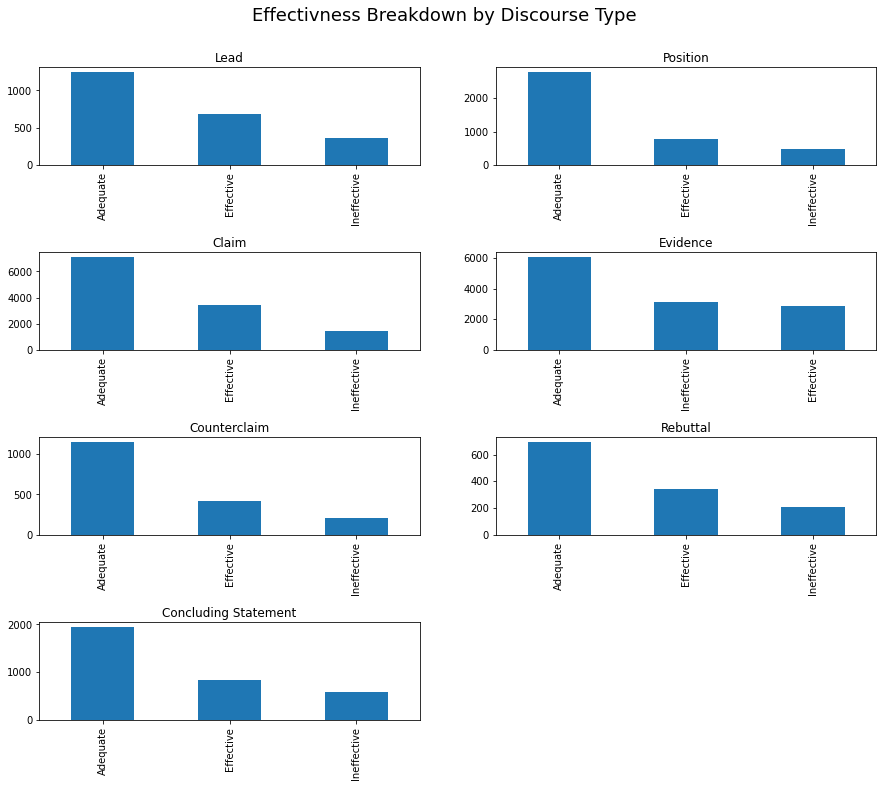

In [61]:
# Discourse effectiveness by discourse type
num_types = train_df.discourse_type.nunique()
discourse_types = train_df.discourse_type.unique()
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.9)
plt.suptitle("Effectivness Breakdown by Discourse Type", fontsize=18, y=0.95)
for i, discourse in enumerate(discourse_types):
    # sns.countplot(train_df[train_df.discourse_type=='Lead']['discourse_effectiveness'], ax=axes[i])
    ax = plt.subplot(4, 2, i+1)

    train_df[train_df.discourse_type==discourse]['discourse_effectiveness'].value_counts().plot(kind='bar', ax=ax)
    # ax.set_xticklabels(rotation=45)
    ax.set_title(discourse)
    

In [59]:
sns.countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


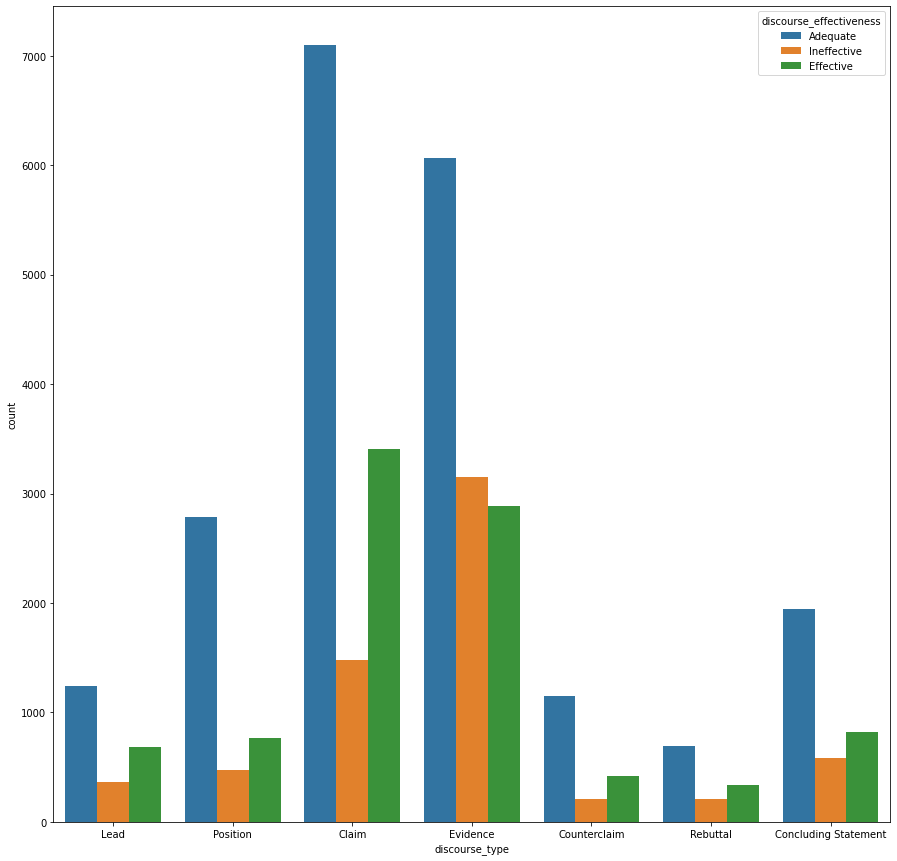

In [64]:

plt.figure(figsize=(15,15))
sns.countplot(train_df.discourse_type, hue=train_df.discourse_effectiveness)